In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cosSum(deltaK):
    """ (6.58) return the cos((deltaK1+deltaK2+deltaK3)*pi/4)
    >>> cosSum(np.array([0, 0, 1]))
    0.7071067811865476
    """
    K1 = deltaK[0]
    K2 = deltaK[1]
    K3 = deltaK[2]
    return np.cos(np.pi*(K1 + K2 + K3)/4)


def eigk(k, a, Kvectors):
    """ calculate the bands at k
    """ 
    b1 = 0.5 * np.array([-1, 1, 1])
    b2 = 0.5 * np.array([1, -1, 1])
    b3 = 0.5 * np.array([1, 1, -1])
    NK = Kvectors.shape[0] # get the number of Kvectors
    H = np.zeros([NK, NK]) # initialize the Hamiltonian
    b = 2 * np.pi / a # reciprocal lattice constant
    # fill in the Hamiltonian matrix
    for i in range(NK):
        for j in range(NK):
            deltaK = Kvectors[i][:] - Kvectors[j][:]
            normDeltaK = np.linalg.norm(deltaK)
            # fill in the potential
            if normDeltaK == np.sqrt(3):
                H[i][j] = -0.1121 * cosSum(deltaK)
            elif normDeltaK == np.sqrt(8):
                H[i][j] = 0.0276 * cosSum(deltaK)
            elif normDeltaK == np.sqrt(11):
                H[i][j] = 0.0362 * cosSum(deltaK)
        
        # fill in the kinetic energy
        # G = l*b1 + m * b2 + n * b3
        G = Kvectors[i][0]*b1+Kvectors[i][1]*b2+Kvectors[i][2]*b3;
        ktotal = k + G
        H[i][i] = 0.5 * (b ** 2) * (np.linalg.norm(ktotal) ** 2)
     
    # solve the eigen value
    w, v = np.linalg.eig(H)
    return w

In [3]:
# lattice constant in atomic unit
a = 5.43

# load the file containing Kvectors
Kvectors = np.loadtxt("Kvectors")

# number of symmtry points between two high-symmetry points
nk = 31

# get the number of Kvectors
NK = Kvectors.shape[0]

# high-symmetry point
G = np.array([0, 0, 0])
X = np.array([0.5, 0, 0])

E = np.zeros([nk,NK])

# get the band structure between G and X
for i in range(nk):
    k = (X - G) * i / (nk - 1) + G
    E[i][:] = np.real(np.sort(eigk(k, a, Kvectors)))
    print(k, "done")

[0. 0. 0.] done
[0.01666667 0.         0.        ] done
[0.03333333 0.         0.        ] done
[0.05 0.   0.  ] done
[0.06666667 0.         0.        ] done
[0.08333333 0.         0.        ] done
[0.1 0.  0. ] done
[0.11666667 0.         0.        ] done
[0.13333333 0.         0.        ] done
[0.15 0.   0.  ] done
[0.16666667 0.         0.        ] done
[0.18333333 0.         0.        ] done
[0.2 0.  0. ] done
[0.21666667 0.         0.        ] done
[0.23333333 0.         0.        ] done
[0.25 0.   0.  ] done
[0.26666667 0.         0.        ] done
[0.28333333 0.         0.        ] done
[0.3 0.  0. ] done
[0.31666667 0.         0.        ] done
[0.33333333 0.         0.        ] done
[0.35 0.   0.  ] done
[0.36666667 0.         0.        ] done
[0.38333333 0.         0.        ] done
[0.4 0.  0. ] done
[0.41666667 0.         0.        ] done
[0.43333333 0.         0.        ] done
[0.45 0.   0.  ] done
[0.46666667 0.         0.        ] done
[0.48333333 0.         0.        ] don

(-0.1, 0.6)

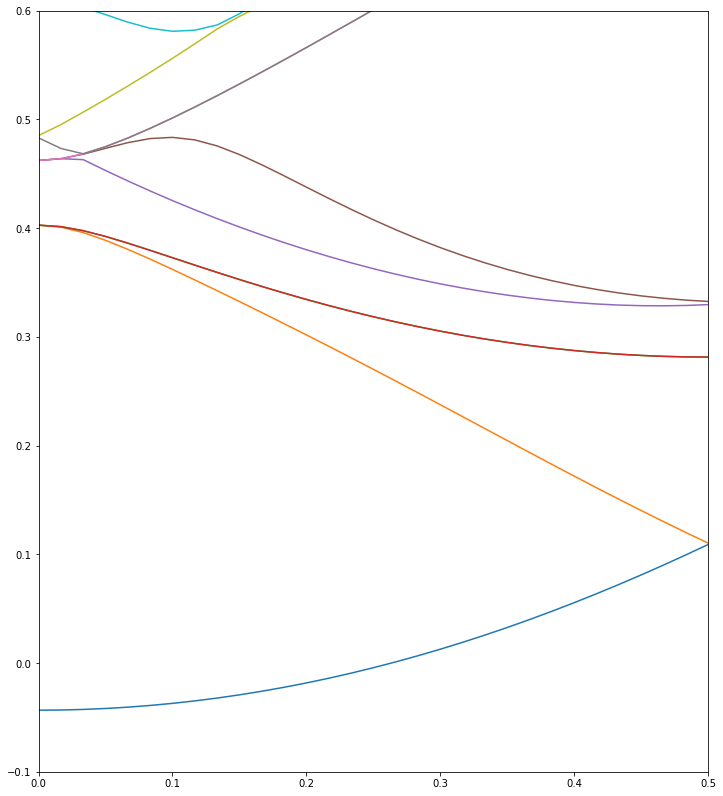

In [4]:
# plotting

# get the distance between G and X
dist = np.linalg.norm(X-G);

xx = np.linspace(0,dist,nk)

plt.figure(figsize=(12,14))
plt.plot(xx,E)
plt.xlim([0,dist])
plt.ylim([-0.1,0.6])